In [136]:
import json
import pandas as pd
import matplotlib.pyplot as plt
from plotnine import *

In [137]:
# Load the JSON file
with open('../Data/pascal_classes.json') as f:
    data = json.load(f)

In [138]:
# labels => image classes
labels = []

In [139]:
# Iterate over the data and add classes to the list
for item in data:
    for annotation in item['annotations']:
        label = annotation['label']
        labels.append(label)

In [140]:
# Convert the list to a DataFrame and count occurrences
df = pd.DataFrame(labels, columns=['Label'])
df = df['Label'].value_counts().reset_index()
df.columns = ['Label', 'Count']
df['Percentage'] = df['Count'] / df['Count'].sum() * 100

In [141]:
# Print dataframe
print(df)
# Export DataFrame to CSV
df.to_csv('../Data/class_count.csv', index=False)

            Label  Count  Percentage
0             Leg  12227   10.083874
1           Torso   8664    7.145390
2            Head   8595    7.088484
3             Ear   7750    6.391594
4             Arm   7521    6.202733
5             Eye   7202    5.939647
6          Person   5487    4.525249
7            Hand   5142    4.240720
8            Neck   4633    3.820936
9           Wheel   4388    3.618880
10           Nose   3942    3.251054
11           Hair   3791    3.126521
12           Foot   3167    2.611894
13          Ebrow   3042    2.508804
14         Window   3031    2.499732
15          Mouth   2804    2.312520
16      Headlight   1918    1.581817
17         Muzzle   1744    1.438315
18          Chair   1657    1.366564
19           Tail   1603    1.322029
20  artifact_body   1574    1.298112
21            Car   1289    1.063066
22           Body   1191    0.982244
23         Mirror   1143    0.942657
24            Dog    970    0.799980
25          Coach    859    0.708436
2

In [142]:
# Specify the labels of interest
labels_of_interest = ['Boat', 'Dog', 'Person', 'Plant', 'Wheel']

In [143]:
# Create a new column 'Label' where labels not in 'labels_of_interest' are replaced with 'Other'
df['Label'] = df.apply(lambda row: row['Label'] if row['Label'] in labels_of_interest else 'Other', axis=1)

# Plot as a Pie Chart

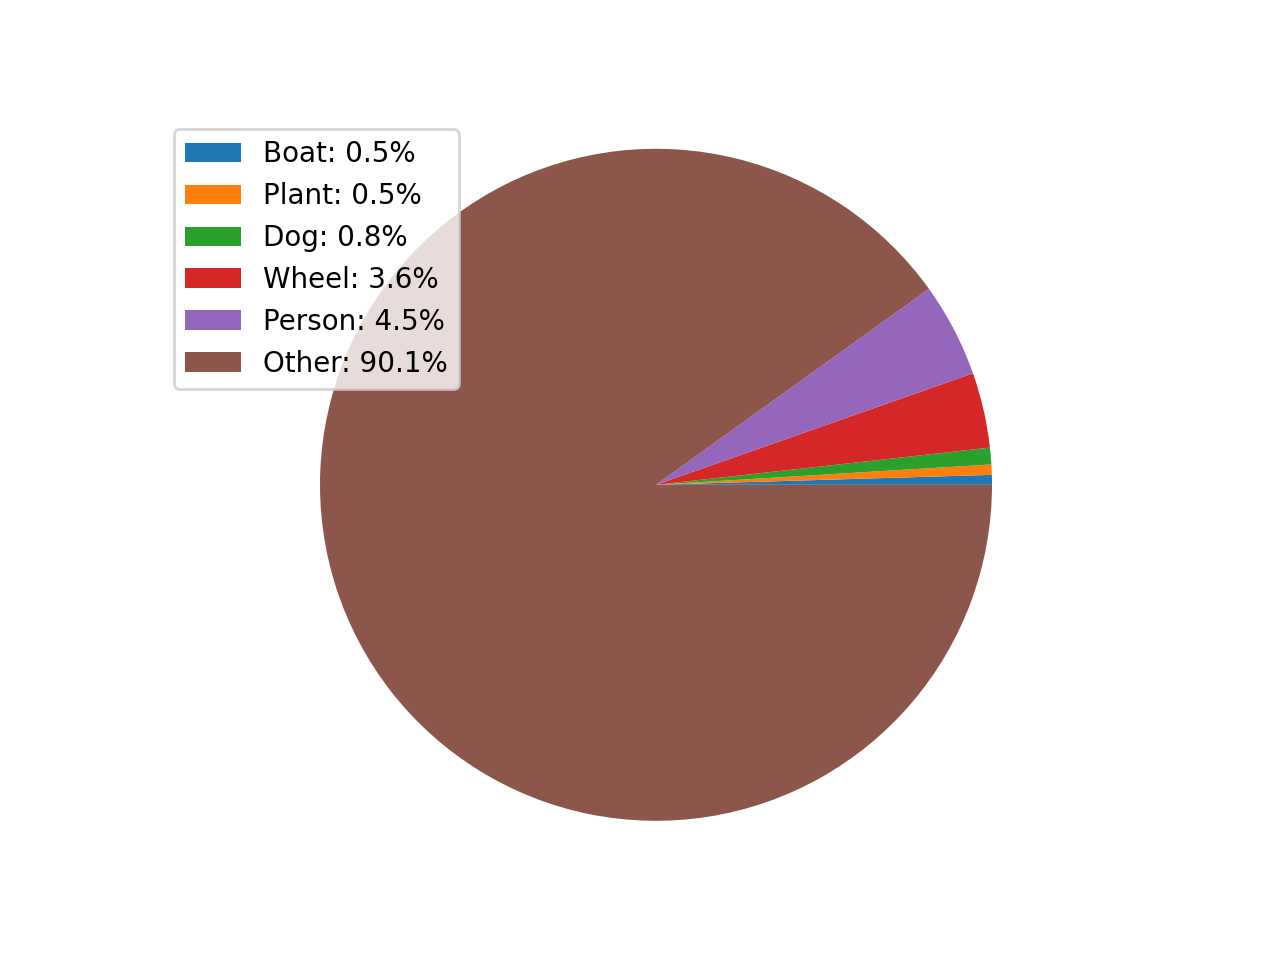

In [144]:
# Group by the new 'Label' column and sum the 'Percentage' column
df_grouped = df.groupby('Label', as_index=False).agg({'Percentage': 'sum'})

# Sort the DataFrame by 'Percentage' in descending order
df_grouped = df_grouped.sort_values('Percentage', ascending=True)


# Plot
patches, texts = plt.pie(df_grouped['Percentage'])
plt.legend(patches, [f'{label}: {perc:.1f}%' for label, perc in zip(df_grouped['Label'], df_grouped['Percentage'])], loc="best")
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular
plt.show()